# Regras de associação

Teorico

Descobrir um padrão nas coisas, exemplo

```
Geralmente X é comprado junto de Y em um merdado

São regras do tipo se entao

ex: se a pessoa tiver mais de 18 e nao for estudante, entao tem 80% de chance de comprar PS4

homens que vao em final de semana compram cerveja e fraudas
```

- Analisar base de dados e criar associação entre esses dados
- A partir do momento que achamos um padrao entre 2 itens, podemos colocar eles juntos para otimizar as vendas



## Algoritmo apriori

Base de dados onde cada linha representa a compra de um cliente, e as colunas informam quais itens ele comprou, vamos tentar criar regras de associação entre esses produdos

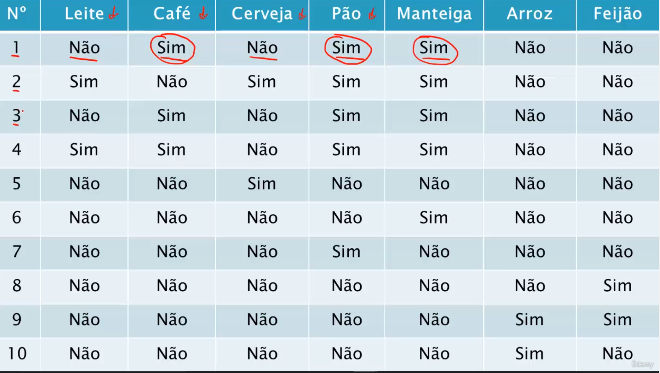

Outra forma de representar a mesma base

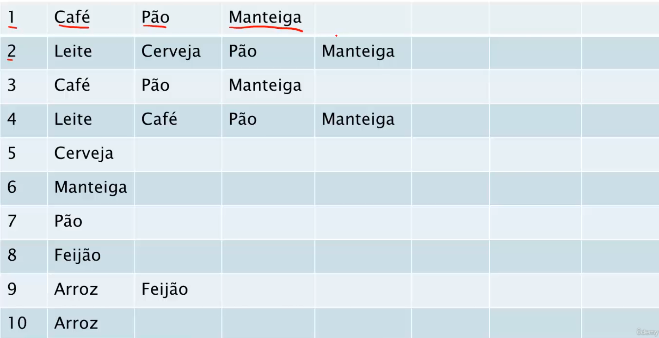

o algoritmo em si


```
Fase 1: descobrir todos os conjuntos de itens com SUPORTE maior ou igual ao minimo especificado pelo usuario

Fase 2: A partir dos conjunto de itens frequentes, descobrir regras de associação com fator de CONFIANÇA maior ou igual ao especificado pelo usuario
```

usuario pode especificar um valor de suporte grande, para buscar itens que aparecem com frequencia, ou um valor baixo, procurando por itens que aparecem pouco


- **Suporte**: Frequencia na qual um item aparece na base de dados


```
Suporte pão = 5 / 10 = 0.5 -> 50%
(numero de transações que tem pao /  total transação)


```



- **Confiança**:


```
Dada uma rega SE x ENTAO y

Confiança = (registros que tem x e y) / (registros que tem x)
```



## **Aplicando na nossa base**



**PASSO 01. SUPORTE**

```
Suporte >= 0.3 # Determinado pelo usuario

01. Calculando suporte de conjuntos com 1 item(itemsets)

  leite - 0.2
  cafe - 0.3    <-- suporte na faixa
  cerveja - 0.2
  pao - 0.5     <-- suporte na faixa
  manteiga - 0.5   <-- suporte na faixa
  arroz - 0.2
  feijão - 0.2


02. Calculando suporte de conjuntos com 2 itens

  vamos medir a frequencia que os itens sao vendidos em CONJUNTO

  Cafe e Pão - 0.3
  Cafe e Manteiga - 0.3
  Pão e Manteiga - 0.4

  Todos passam no suporte


0.3 Calculando o suporte de conjunto de 3 itens

  Cafe, Pão, Manteiga - 0.3

  Vamos fazer a montagem de regras de associação para os conjuntos que passaram

```



 **PASSO 02. CONFIANÇA**
```
Conficança >= 0.8 # Determinado pelo usuario

01. Regras para {Cafe, Pao}
  SE Cafe ENTÃO pao - 3/3 = 1  <-- Passou na confiança
  SE pao ENTÃO cafe - 3/5 = 0.6

02. Regras para {Cafe, Manteiga}
  SE cafe ENTAO manteiga - 3/3 = 1 <-- Passou na confiança
  SE manteiga ENTAO cafe - 3/5 = 0.6

03. Regras para {pao, Manteiga}
  SE pao ENTAO manteiga - 4/5 = 0.8 <-- Passou na confiança
  SE manteiga ENTAO pao - 4/5 = 0.8 <-- Passou na confiança

04. Regras para{cafe, pao, manteiga}
  SE(cafe, pao) ENTAO manteiga - 3/3 = 1 <-- Passou na confiança
  SE(cafe, manteiga) ENTAO pao - 3/3 = 1 <-- Passou na confiança
  SE(manteiga, pao) ENTAO cafe - 3/4 = 0.75
  SE(cafe) ENTAO (pao,manteiga) - 3/3 = 1 <-- Passou na confiança
  SE(pao) ENTAO (cafe,manteiga) - 3/5 =0.6
  SE(manteiga) ENTAO (pao,cafe) - 3/5 = 0.6

```

Calculando o LIFT: Escolhendo as melhores regras, escolhendo as mais relevantes entre elas


```
Regras finais:
  SE Cafe ENTÃO pao - 3/3 = 1
  SE cafe ENTAO manteiga - 3/3 = 1
  SE pao ENTAO manteiga - 4/5 = 0.8
  SE manteiga ENTAO pao - 4/5 = 0.8
  SE(cafe, pao) ENTAO manteiga - 3/3 = 1
  SE(cafe, manteiga) ENTAO pao - 3/3 = 1
  SE(cafe) ENTAO (pao,manteiga) - 3/3 = 1

LIFT = confiança(X, Y) / Suporte(Y)
  SE Cafe ENTÃO pao - 1 / 0.5 = 2(Clientes que compram cafe tem duas vezes mais chances de comprarem pão)
  SE cafe ENTAO manteiga - 1 / 0.5 = 2
  SE pao ENTAO manteiga - 0.8 / 0.5 = 1.6
  SE manteiga ENTAO pao - 0.8 / 0.5 = 1.6
  SE(cafe, pao) ENTAO manteiga - 1 / 0.5 = 2
  SE(cafe, manteiga) ENTAO pao - 1 / 0.5 = 2
  SE(cafe) ENTAO (pao,manteiga) - 1 / 0.4 = 2.4

```

A partir do LIFT, escolhemos as melhores regras, a quantidade varia de acordo com o projeto em questão

# Algoritmo Apriori

implementação

## Base De da dados mercado 1

In [1]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=c79b038b6d49b26486a434575fd5f5fffa07c5f2c8124e39a15bf3ea4eb852c5
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
import pandas as pd
from apyori import apriori


In [6]:
base_mercado_1 = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/mercado.csv', header= None)
base_mercado_1.head()

,0,1,2,3
0,leite,cerveja,pao,manteiga
1,cafe,pao,manteiga,NaN
2,cafe,pao,manteiga,NaN
3,leite,cafe,pao,manteiga
4,cerveja,NaN,NaN,NaN


In [15]:
# Precisamos colocar os dados em forma de lista por causa da apyori
transacoes = []
for i in range(len(base_mercado_1)):
  # Vai criar a linha, pegando todos os valores dela
  linha = [str(base_mercado_1.values[i, j]) for j in range(base_mercado_1.shape[1])]
  transacoes.append(linha)
transacoes

[['leite', 'cerveja', 'pao', 'manteiga'],
 ['cafe', 'pao', 'manteiga', 'nan'],
 ['cafe', 'pao', 'manteiga', 'nan'],
 ['leite', 'cafe', 'pao', 'manteiga'],
 ['cerveja', 'nan', 'nan', 'nan'],
 ['manteiga', 'nan', 'nan', 'nan'],
 ['pao', 'nan', 'nan', 'nan'],
 ['feijao', 'nan', 'nan', 'nan'],
 ['arroz', 'feijao', 'nan', 'nan'],
 ['arroz', 'nan', 'nan', 'nan']]

In [16]:
type(transacoes)

list

In [22]:
regras = apriori(transacoes, min_support = 0.3, min_confidence = 0.8, min_lift = 2) # SUporte e confianca
resultados = list(regras)
resultados

[RelationRecord(items=frozenset({'manteiga', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)]),
 RelationRecord(items=frozenset({'pao', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0)]),
 RelationRecord(items=frozenset({'pao', 'manteiga', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao', 'manteiga'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'manteiga', 'cafe'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'pao', 'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])]

In [23]:
len(resultados) # Não é a quantidade de regras

3

In [24]:
# Selecionando uma das regras
resultados[0]

RelationRecord(items=frozenset({'manteiga', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])



```
RelationRecord(items=frozenset({'manteiga', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])
```
- support = 0.3 -> suporte de cafe e manteiga juntos
- OrderedStatistic -> é a regra
- SE cade ENTAO manteiga
- confidence = 1 , lift = 2


In [47]:
# Vai pegar as regras para o primeiro conjunto, pode ser mais de uma
resultados[0]


RelationRecord(items=frozenset({'manteiga', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])

In [48]:
# Vai pegar o conjunto
resultados[1][0]

frozenset({'cafe', 'pao'})

In [49]:
# Support
resultados[1][1]

0.3

In [50]:
# pegar somente as regras
r = resultados[1][2]
r

[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0)]

SE x ENTAO y

In [51]:
# Retorna o x da primeira regra
r[0][0]

frozenset({'cafe'})

In [52]:
# Retorna o y da primeira regra
r[0][1]

frozenset({'pao'})

In [53]:
#Confiança
r[0][2]

1.0

In [54]:
#Lift
r[0][3]

2.0



```
Agora vamos construir uma codificação das regras mais faceis de interpretar

```



In [66]:
# Armazenando os valores para ficar mais legivel
valores_x = [] # Valor do SE
valores_y = [] # Valor do ENTAO
suporte = []
confianca = []
lift = []
# Resultados tem as regras de cada conjunto
for resultado in resultados:
  sup = resultado[1] # Suporte
  result_rule = resultado[2] # Regras do conjunto em questao

  # precisamos percorrer as regras
  for regra in result_rule:
    x = list(regra[0]) # Pega o x
    y = list(regra[1]) # pega o y
    c = regra[2] # COnfiança
    l = regra[3] # lift

    # Colocando nas listas
    valores_x.append(x)
    valores_y.append(y)
    suporte.append(sup)
    confianca.append(c)
    lift.append(l)



In [67]:
len(valores_x), len(valores_y), len(suporte), len(confianca), len(lift)

(5, 5, 5, 5, 5)

In [68]:
regras_df = pd.DataFrame({'SE': valores_x,
                          'ENTAO': valores_y,
                          'Suporte': suporte,
                          'Confianca': confianca,
                          'Lift': lift})

In [73]:
regras_df.sort_values(by='Lift', ascending=False)

,SE,ENTAO,Suporte,Confianca,Lift
2,[cafe],"[pao, manteiga]",0.3,1.0,2.5
0,[cafe],[manteiga],0.3,1.0,2.0
1,[cafe],[pao],0.3,1.0,2.0
3,"[manteiga, cafe]",[pao],0.3,1.0,2.0
4,"[pao, cafe]",[manteiga],0.3,1.0,2.0


## Base de dados mercado 2
base de dados real


In [74]:
base_mercado_2 = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/mercado2.csv', header= None)
base_mercado_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Precisamos colocar os dados em forma de lista por causa da apyori
transacoes = []
for i in range(base_mercado_2.shape[0]): # Shape[0] = linhas
  # Vai criar a linha, pegando todos os valores dela
  linha = [str(base_mercado_2.values[i, j]) for j in range(base_mercado_2.shape[1])]
  transacoes.append(linha)
transacoes

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 



```
Produtos que sao vendidos 4 vezes por dia
4 * 7 = 28 # 7 pq a base de dados é semanal

support = 28 / 7501 # Numero de linhas
```



In [78]:
regras = apriori(transacoes, min_support=0.003, min_confidence=0.2, min_lift=3)
regras = list(regras)
len(regras)

160

In [79]:
# Armazenando os valores para ficar mais legivel
valores_x = [] # Valor do SE
valores_y = [] # Valor do ENTAO
suporte = []
confianca = []
lift = []
# Resultados tem as regras de cada conjunto
for resultado in regras:
  sup = resultado[1] # Suporte
  result_rule = resultado[2] # Regras do conjunto em questao

  # precisamos percorrer as regras
  for regra in result_rule:
    x = list(regra[0]) # Pega o x
    y = list(regra[1]) # pega o y
    c = regra[2] # COnfiança
    l = regra[3] # lift

    # Colocando nas listas
    valores_x.append(x)
    valores_y.append(y)
    suporte.append(sup)
    confianca.append(c)
    lift.append(l)



In [82]:
regras_df = pd.DataFrame({'SE': valores_x,
                          'ENTAO': valores_y,
                          'Suporte': suporte,
                          'Confianca': confianca,
                          'Lift': lift})

regras_df.sort_values(by='Confianca', ascending=False)

,SE,ENTAO,Suporte,Confianca,Lift
347,"[soup, frozen vegetables, milk]","[nan, mineral water]",0.003066,0.766667,3.218112
353,"[soup, frozen vegetables, nan, milk]",[mineral water],0.003066,0.766667,3.216312
180,"[soup, frozen vegetables, milk]",[mineral water],0.003066,0.766667,3.216312
106,"[ground beef, cereals, nan]",[spaghetti],0.003066,0.676471,3.885303
104,"[ground beef, cereals]","[spaghetti, nan]",0.003066,0.676471,3.885303
...,...,...,...,...,...
358,"[frozen vegetables, shrimp]","[spaghetti, nan, mineral water]",0.003333,0.200000,3.348661
371,"[ground beef, nan, milk]","[spaghetti, mineral water]",0.004399,0.200000,3.348661
370,"[ground beef, milk]","[spaghetti, nan, mineral water]",0.004399,0.200000,3.348661
224,"[ground beef, milk]","[spaghetti, mineral water]",0.004399,0.200000,3.348661


Nesse caso nao temos metricas convencionais, teriamos que levaer ate a empresa em questão e apresentar os resultados

# Algoritmo ECLAT

- é uma versão simplicidada do apriori
- utiliza somente o suporte
- objetivo nao é gerar regras, mas sim gerar os itens mais frequentes


```
 01. Define o suporte minimo
 02. extrair o conjunto de intens que tenham o suporte minimo
 03. ordenar os dados de acordo com o suporte
```

- é como se fosse a primeira parte do algoritmo a priori




In [83]:
!pip install pyECLAT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
base_mercado_1

,0,1,2,3
0,leite,cerveja,pao,manteiga
1,cafe,pao,manteiga,NaN
2,cafe,pao,manteiga,NaN
3,leite,cafe,pao,manteiga
4,cerveja,NaN,NaN,NaN
5,manteiga,NaN,NaN,NaN
6,pao,NaN,NaN,NaN
7,feijao,NaN,NaN,NaN
8,arroz,feijao,NaN,NaN
9,arroz,NaN,NaN,NaN


In [87]:
from pyECLAT import ECLAT
eclat = ECLAT(data=base_mercado_1)

In [89]:
# o algoritmo cria um novo df, que representa o mesmo df de outra forma
eclat.df_bin

,leite,arroz,pao,manteiga,cerveja,feijao,cafe
0,1,0,1,1,1,0,0
1,0,0,1,1,0,0,1
2,0,0,1,1,0,0,1
3,1,0,1,1,0,0,1
4,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0
8,0,1,0,0,0,1,0
9,0,1,0,0,0,0,0


In [90]:
eclat.uniq_

[nan, 'leite', 'arroz', 'pao', 'manteiga', 'cerveja', 'feijao', 'cafe']

In [91]:
eclat.df_bin.sum()

leite       2
arroz       2
pao         5
manteiga    5
cerveja     2
feijao      2
cafe        3
dtype: int64

In [92]:
indices, suporte = eclat.fit(min_support=0.3, min_combination=1, max_combination=3) # suporte, numero minimo emaximo de itens nos conjutnos

Combination 1 by 1


3it [00:00, 122.91it/s]


Combination 2 by 2


3it [00:00, 164.07it/s]


Combination 3 by 3


1it [00:00, 128.75it/s]


In [93]:
indices

{'pao': [0, 1, 2, 3, 6],
 'manteiga': [0, 1, 2, 3, 5],
 'cafe': [1, 2, 3],
 'pao & manteiga': [0, 1, 2, 3],
 'pao & cafe': [1, 2, 3],
 'manteiga & cafe': [1, 2, 3],
 'pao & manteiga & cafe': [1, 2, 3]}

In [95]:
# Vai dar o suporte em si
suporte

{'pao': 0.5,
 'manteiga': 0.5,
 'cafe': 0.3,
 'pao & manteiga': 0.4,
 'pao & cafe': 0.3,
 'manteiga & cafe': 0.3,
 'pao & manteiga & cafe': 0.3}